# Задание 2. Продумать структуру базы данных и отрисовать в редакторе.

##Структура:

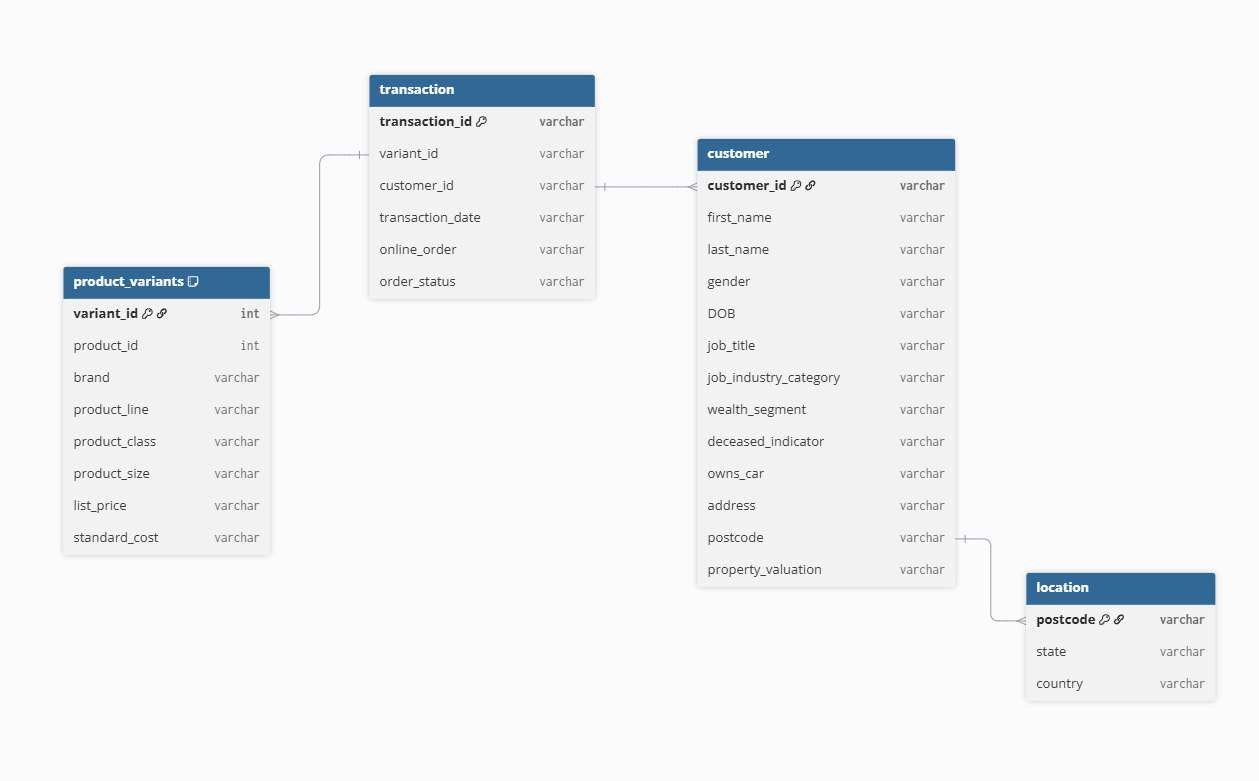

# Задание 3. Нормализация базы данных: от 1НФ до 3НФ
## Исходные таблицы

База состоит из двух таблиц:

- transaction — 20 000 записей о транзакциях:  
  transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost.

- customer — 4 000 записей о клиентах:  
  customer_id, first_name, last_name, gender, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, address, postcode, country, property_valuation.



## 1НФ — Первая нормальная форма

Обе таблицы уже находятся в 1НФ, так как:
- Все значения атомарны.
- Нет повторяющихся групп.

> Ничего не меняем.


## 2НФ — Вторая нормальная форма

Таблица transaction не в 2НФ, потому что:
- Первичный ключ — transaction_id.
- Поля brand, product_line, product_class, product_size, list_price, standard_cost зависят не от транзакции, а от характеристик продукта — это частичная зависимость.
### Решение:
Выносим данные о продукте в отдельную таблицу product_variants

variant_id - суррогатный ключ.

Тогда таблица с такими колонками:

- variant_id (PK)
- product_id
- brand
- product_line
- product_class
- product_size
- list_price
- standard_cost

Таблица transaction упрощается до:
- transaction_id (PK)
- variant_id (FK → `product_variants`)
- customer_id (FK → `customer`)
- transaction_date
- online_order
- order_status

> Теперь все поля зависят только от `transaction_id` → 2НФ достигнута.


## 3НФ — Третья нормальная форма

Таблица customer не в 3НФ из-за транзитивной зависимости:
→ country, state зависит не от customer_id, а от postcode

### Решение:
Создаём таблицу location с колонками:

- postcode (PK)
- state
- country

Таблица customer обновляется:
- Убираем country и state
- Оставляем postcode как внешний ключ на location.postcode

> Теперь нет транзитивных зависимостей → 3НФ достигнута.


# Задание 4. Создать все таблицы в DBeaver
Ниже приведен sql скрипт для создани 4 таблиц


```sql
create table product_variants (
	variant_id INT primary key,
	product_id INT not null,
	product_line VARCHAR(15) null,
	product_class VARCHAR(10) null,
	product_size VARCHAR(10) null,
	list_price DECIMAL(10,2) not null,
	standard_cost DECIMAL(10,2) not null
);

create table transaction (
	transaction_id INT primary key,
	variant_id INT not null,
	customer_id INT not null,
	transaction_date DATE not null,
	online_order BOOLEAN not null,
	order_status VARCHAR(10) not NULL
);

create table customer (
	customer_id INT primary key,
	first_name VARCHAR(30) null,
	last_name VARCHAR(30) null,
	gender VARCHAR(10) null,
	DOB DATE NULL,
	job_title VARCHAR(50) null,
	job_industry_category VARCHAR(50) null,
	wealth_segment VARCHAR(30) not null,
	deceased_indicator VARCHAR(5) not null,
	owns_car VARCHAR(5) not null,
	address VARCHAR(50) not null,
	postcode INT not null,
	property_valuation INT not null
);

create table location (
	postcode INT primary key,
	state VARCHAR(30) not null,
	country Varchar(25) not null
)
```

# Задание 5. Загрузить данные в таблицы в соответствии с созданной структурой

Данные были загружены как csv файлы используя возможности инструмента DBeaver.

Скриншоты приложены ниже

## Таблица transaction

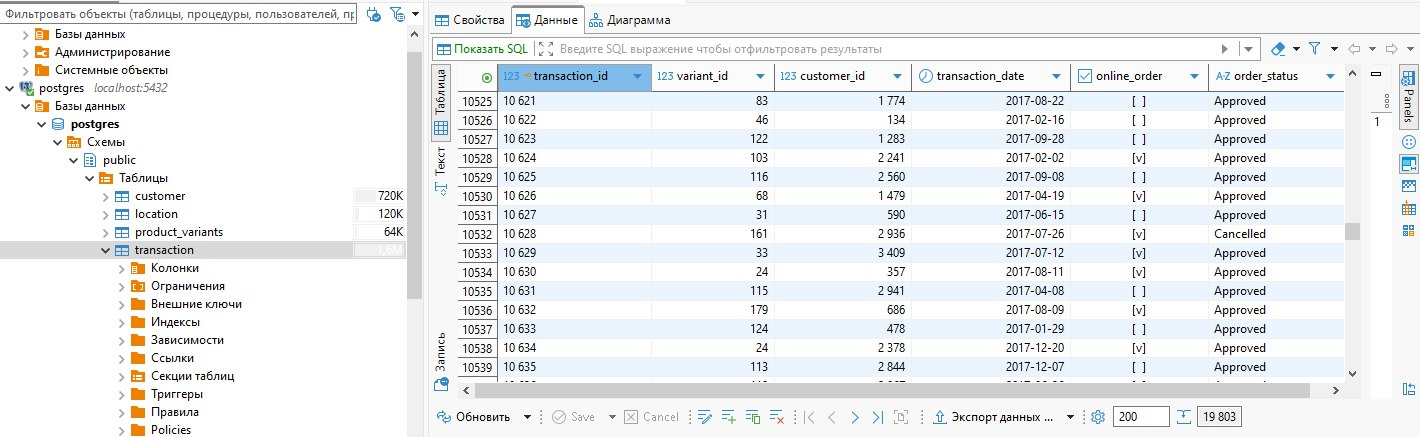

## Таблица product_variants

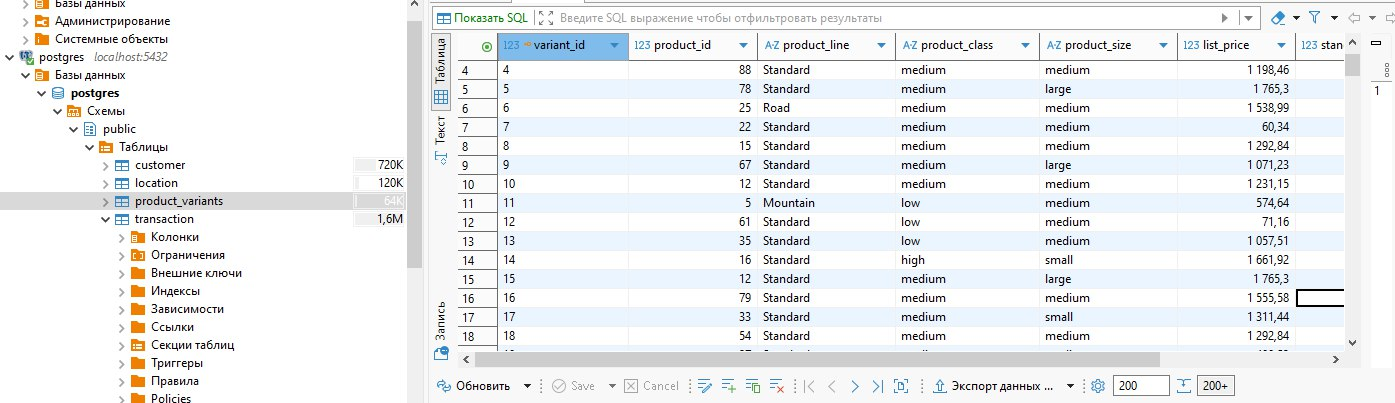

## Таблица location

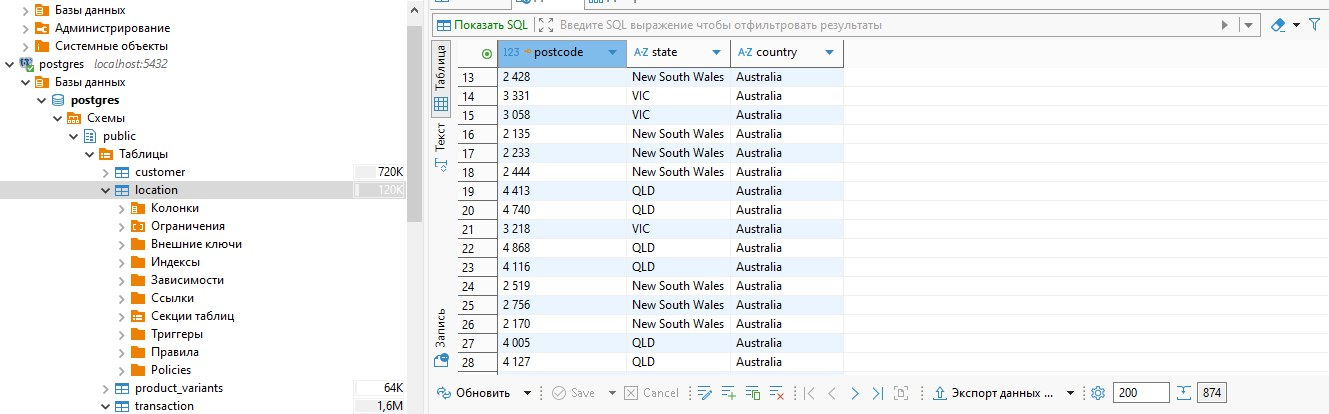

## Таблица customer

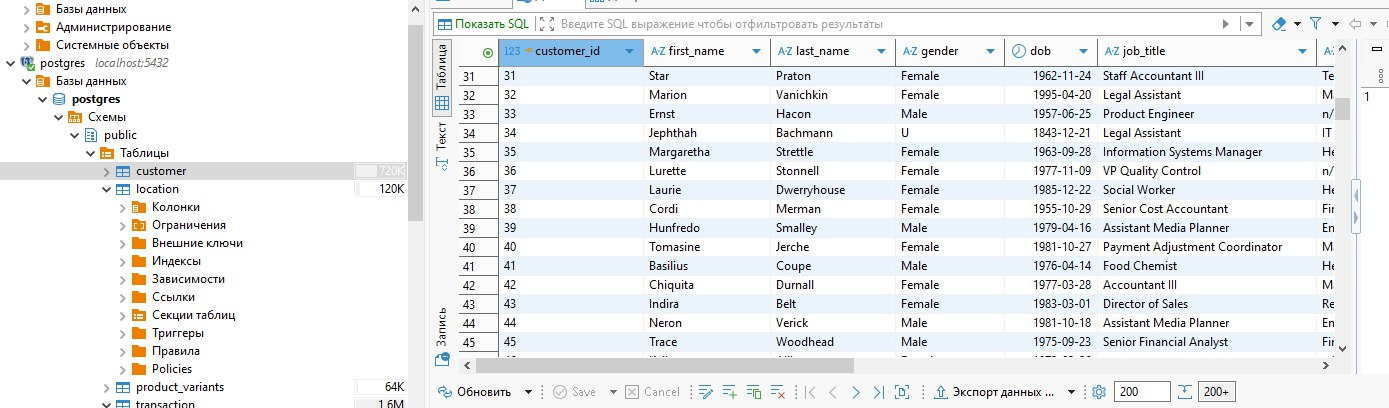